In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

**Loading the dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/datasets ML/modcloth_final_data.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.shape

(82790, 16)

In [6]:
#making size as last column as we need to predict the size
df = df[['item_id','waist','quality','cup size','hips','bra size','category','bust','height','user_name','length','fit','user_id','shoe size','shoe width','size']]
df.head()

item_id  waist  quality cup size  ...  user_id  shoe size shoe width size
0   123373   29.0      5.0        d  ...   991571        NaN        NaN    7
1   123373   31.0      3.0        b  ...   587883        NaN        NaN   13
2   123373   30.0      2.0        b  ...   395665        9.0        NaN    7
3   123373    NaN      5.0     dd/e  ...   875643        NaN        NaN   21
4   123373    NaN      5.0        b  ...   944840        NaN        NaN   18

[5 rows x 16 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_id     82790 non-null  int64  
 1   waist       2882 non-null   float64
 2   quality     82722 non-null  float64
 3   cup size    76535 non-null  object 
 4   hips        56064 non-null  float64
 5   bra size    76772 non-null  float64
 6   category    82790 non-null  object 
 7   bust        11854 non-null  object 
 8   height      81683 non-null  object 
 9   user_name   82790 non-null  object 
 10  length      82755 non-null  object 
 11  fit         82790 non-null  object 
 12  user_id     82790 non-null  int64  
 13  shoe size   27915 non-null  float64
 14  shoe width  18607 non-null  object 
 15  size        82790 non-null  int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 10.1+ MB


In [8]:
df.describe()

item_id        waist  ...     shoe size          size
count   82790.000000  2882.000000  ...  27915.000000  82790.000000
mean   469325.229170    31.319223  ...      8.145818     12.661602
std    213999.803314     5.302849  ...      1.336109      8.271952
min    123373.000000    20.000000  ...      5.000000      0.000000
25%    314980.000000    28.000000  ...      7.000000      8.000000
50%    454030.000000    30.000000  ...      8.000000     12.000000
75%    658440.000000    34.000000  ...      9.000000     15.000000
max    807722.000000    50.000000  ...     38.000000     38.000000

[8 rows x 8 columns]

In [9]:
df[['foot','inches']] = df['height'].str.split(expand = True)
df['foot'] = df['foot'].str.extract('(\d*)').astype(float) #Match 0 or more digits(\d*)
df['inches'] = df['inches'].str.extract('(\d*)').astype(float)
#Converting height into cm
df['height'] = df['foot'].astype(float) * 30.48 + df['inches'].astype(float)*2.45
del df['foot']
del df['inches']

In [10]:
df.head()

item_id  waist  quality cup size  ...  user_id  shoe size shoe width size
0   123373   29.0      5.0        d  ...   991571        NaN        NaN    7
1   123373   31.0      3.0        b  ...   587883        NaN        NaN   13
2   123373   30.0      2.0        b  ...   395665        9.0        NaN    7
3   123373    NaN      5.0     dd/e  ...   875643        NaN        NaN   21
4   123373    NaN      5.0        b  ...   944840        NaN        NaN   18

[5 rows x 16 columns]

In [11]:
null_values = pd.DataFrame({"missing_values" : df.isnull().sum(), 'Percentage': (df.isnull().sum()/82790)*100})
null_values

missing_values  Percentage
item_id                  0    0.000000
waist                79908   96.518903
quality                 68    0.082136
cup size              6255    7.555260
hips                 26726   32.281677
bra size              6018    7.268994
category                 0    0.000000
bust                 70936   85.681846
height                4005    4.837541
user_name                0    0.000000
length                  35    0.042276
fit                      0    0.000000
user_id                  0    0.000000
shoe size            54875   66.282160
shoe width           64183   77.525063
size                     0    0.000000

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text major ticklabel objects>)

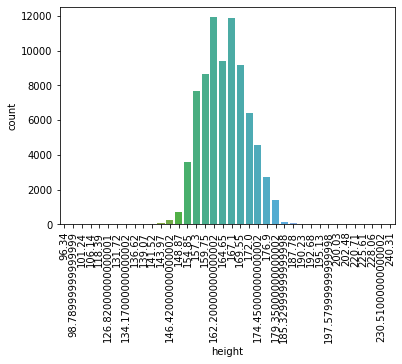

In [12]:
sns.countplot(x='height', data=df)
plt.xticks(rotation=90)

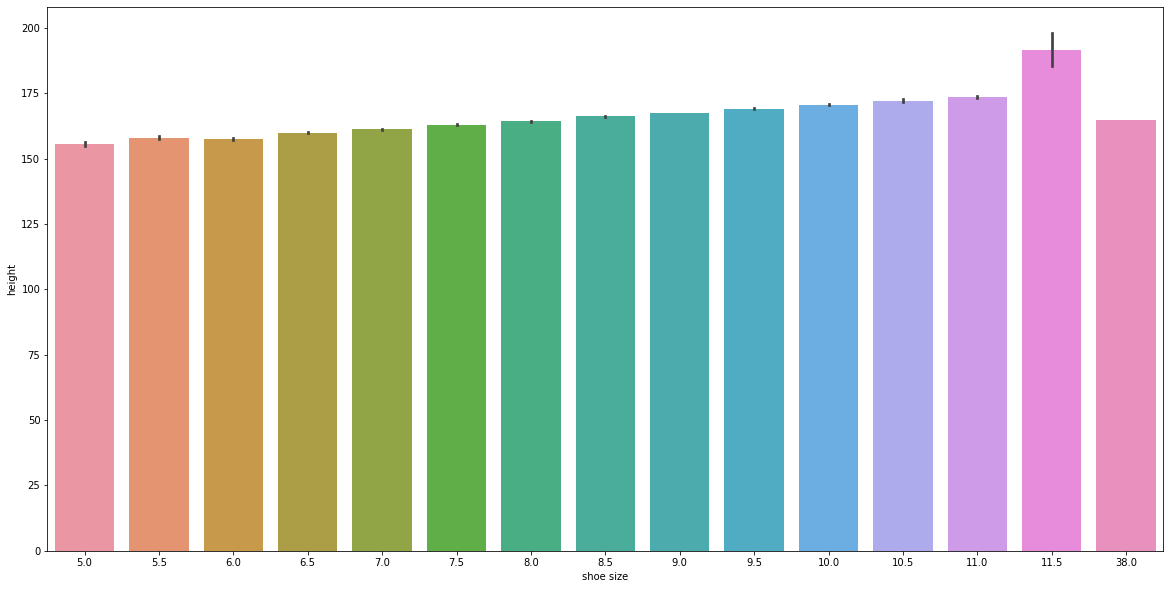

In [13]:
plt.figure(figsize=(20,10))
sns.barplot(data=df, x ='shoe size' , y = 'height')
plt.xlabel('shoe size')
plt.ylabel('height')
plt.show()

In [14]:
df.rename(columns={'shoe size': 'shoe_size'}, inplace=True)
df.rename(columns={'shoe width': 'shoe_width'}, inplace=True)

In [15]:
df[df['shoe_size'] ==38]

item_id  waist  quality cup size  ...  user_id  shoe_size shoe_width size
37313   416942   35.0      5.0        d  ...   237498       38.0    average   12

[1 rows x 16 columns]

In [16]:
df.at[37313,'shoe_size'] = None

In [17]:
def height_value(x):
  if x<165:
    return 5.5
  elif 165<x<185:
    return 6.5
  elif 185<x<200:
    return 7.5
  else:
    return None

In [18]:
df.shoe_size.fillna(df['height'].apply(height_value),inplace=True)

In [19]:
df.shoe_size.isnull().sum()

2665

In [20]:
df.head()

item_id  waist  quality cup size  ...  user_id  shoe_size shoe_width size
0   123373   29.0      5.0        d  ...   991571        6.5        NaN    7
1   123373   31.0      3.0        b  ...   587883        5.5        NaN   13
2   123373   30.0      2.0        b  ...   395665        9.0        NaN    7
3   123373    NaN      5.0     dd/e  ...   875643        NaN        NaN   21
4   123373    NaN      5.0        b  ...   944840        5.5        NaN   18

[5 rows x 16 columns]

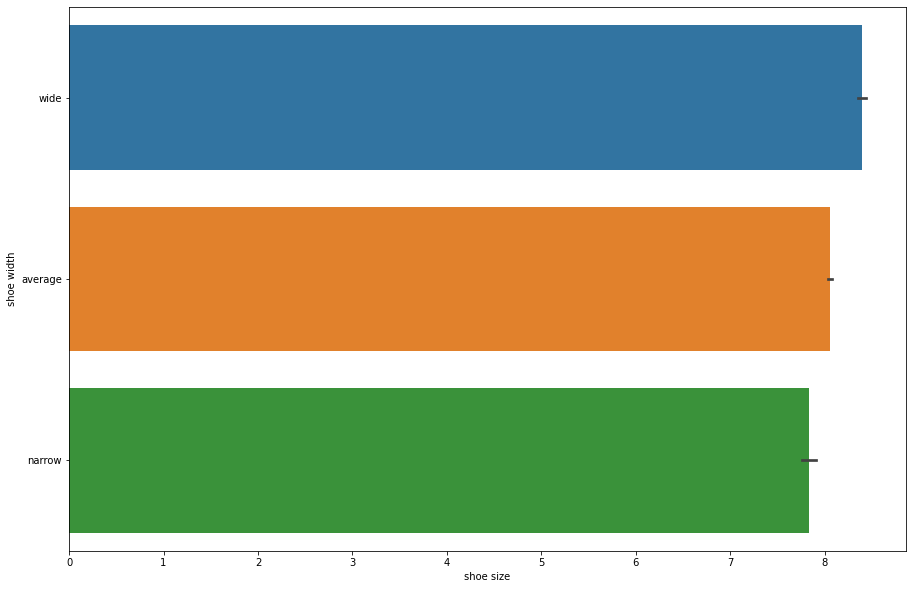

In [21]:
plt.figure(figsize=(15,10))
sns.barplot(data=df , x = 'shoe_size', y ='shoe_width')
plt.ylabel('shoe width')
plt.xlabel('shoe size')
plt.show()

In [22]:
def shoe_width(x):
  if 6<x<7:
    return 'narrow'
  elif 7<x<8:
    return 'average' 
  else :
    return 'wide'

In [23]:
df.shoe_width.fillna(df['shoe_size'].apply(shoe_width),inplace=True)

In [24]:
df.shoe_width.isnull().sum()

0

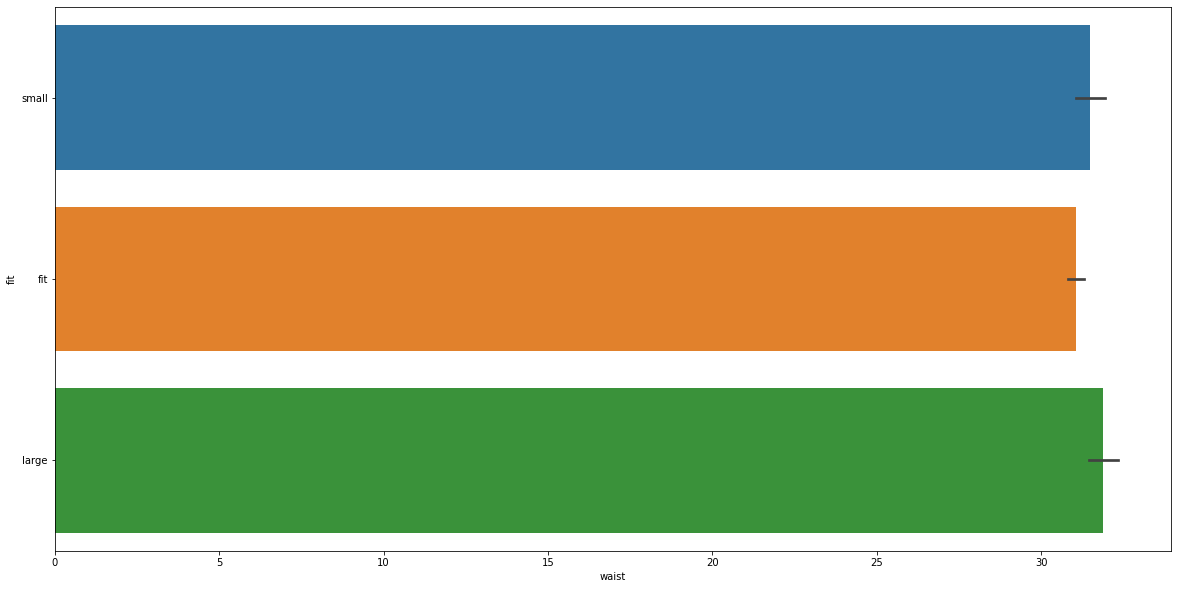

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(data=df , y = 'fit', x ='waist')
plt.ylabel('fit')
plt.xlabel('waist')
plt.show()

In [26]:
def fit_value(x):
  if x == 'small':
    return  random.randint(20, 35)
  else:
    return random.randint(35, 50)

In [27]:
df.waist.fillna(df['fit'].apply(fit_value),inplace=True)

In [28]:
df['bust'].unique()

array([36.0, nan, 39.0, 34.0, 43.0, 35.0, 38.0, 33.0, 40.0, 41.0, 44.0,
       45.0, 37.0, 30.0, 32.0, 42.0, 48.0, 46.0, 51.0, 25.0, 31.0, 26.0,
       52.0, 22.0, 50.0, 47.0, 56.0, 58.0, 49.0, 54.0, 55.0, 53.0, 27.0,
       28.0, 29.0, 20.0, 57.0, 23.0, '44', '42', '34', '36', '32', '38',
       '40', '33', '47', '35', '41', '37', '39', '46', '30', '31', '20',
       '43', '48', '45', '23', '49', '52', '26', '27', '53', '28', '56',
       '57', '37-39', '54', '50', '25', '51', '29', '58', '24', '55',
       59.0, 24.0], dtype=object)

In [29]:
df.bust.replace("37-39",'38',inplace=True)

In [30]:
df['bust'] = df['bust'].astype(float)

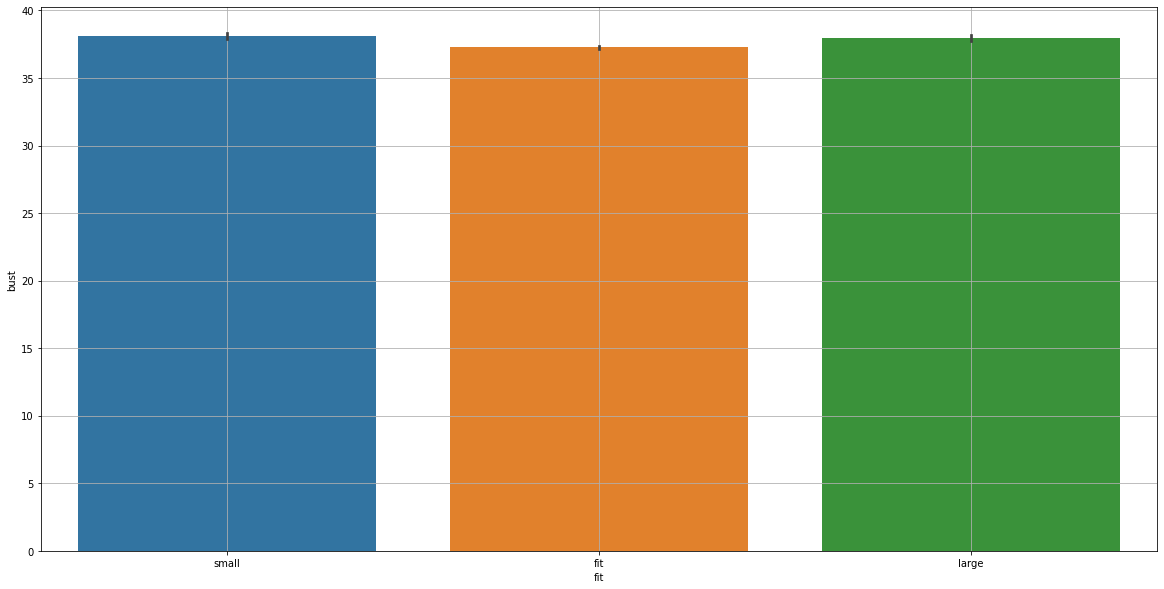

In [31]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=df , x = 'fit', y ='bust')
plt.xlabel('fit')
plt.ylabel('bust')
ax.grid()
plt.show()

In [32]:
def fit_value1(x):
  if x == 'fit':
    return 36 
  else:
    return 38.5

In [33]:
df.bust.fillna(df['fit'].apply(fit_value1),inplace=True)

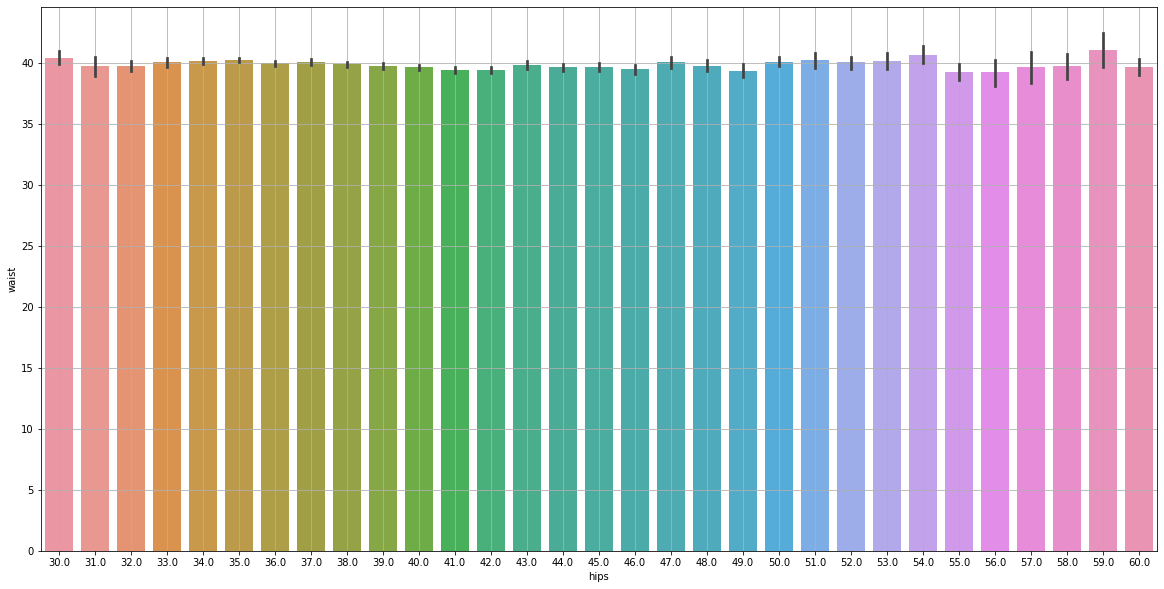

In [34]:
plt.figure(figsize=(20,10))
ax = sns.barplot(data=df , x = 'hips', y ='waist')
plt.xlabel('hips')
plt.ylabel('waist')
ax.grid()
plt.show()

In [35]:
df.hips.fillna(random.randint(38,42),inplace=True)

In [36]:
df.isnull().sum()

item_id          0
waist            0
quality         68
cup size      6255
hips             0
bra size      6018
category         0
bust             0
height        4005
user_name        0
length          35
fit              0
user_id          0
shoe_size     2665
shoe_width       0
size             0
dtype: int64

In [37]:
df.dropna(inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73007 entries, 0 to 82787
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_id     73007 non-null  int64  
 1   waist       73007 non-null  float64
 2   quality     73007 non-null  float64
 3   cup size    73007 non-null  object 
 4   hips        73007 non-null  float64
 5   bra size    73007 non-null  float64
 6   category    73007 non-null  object 
 7   bust        73007 non-null  float64
 8   height      73007 non-null  float64
 9   user_name   73007 non-null  object 
 10  length      73007 non-null  object 
 11  fit         73007 non-null  object 
 12  user_id     73007 non-null  int64  
 13  shoe_size   73007 non-null  float64
 14  shoe_width  73007 non-null  object 
 15  size        73007 non-null  int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 9.5+ MB


In [39]:
df.head()

item_id  waist  quality cup size  ...  user_id  shoe_size shoe_width  size
0   123373   29.0      5.0        d  ...   991571        6.5     narrow     7
1   123373   31.0      3.0        b  ...   587883        5.5       wide    13
2   123373   30.0      2.0        b  ...   395665        9.0       wide     7
4   123373   32.0      5.0        b  ...   944840        5.5       wide    18
5   123373   27.0      5.0        c  ...   162012        5.5       wide    11

[5 rows x 16 columns]

In [40]:
Le = LabelEncoder()
df['cup size'] = Le.fit_transform(df['cup size'])

In [41]:
df['category'] = Le.fit_transform(df['category'])
df['length'] = Le.fit_transform(df['length'])
df['fit'] = Le.fit_transform(df['fit'])
df['shoe_width'] = Le.fit_transform(df['shoe_width'])

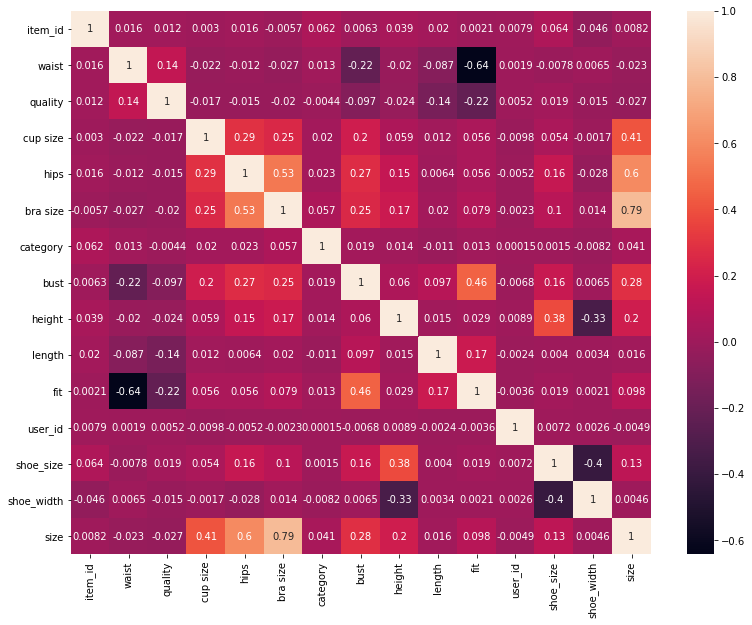

In [42]:
corr = df.corr()
plt.figure(figsize=(13,10))
sns.heatmap(data=corr,annot=True)
plt.show()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73007 entries, 0 to 82787
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_id     73007 non-null  int64  
 1   waist       73007 non-null  float64
 2   quality     73007 non-null  float64
 3   cup size    73007 non-null  int64  
 4   hips        73007 non-null  float64
 5   bra size    73007 non-null  float64
 6   category    73007 non-null  int64  
 7   bust        73007 non-null  float64
 8   height      73007 non-null  float64
 9   user_name   73007 non-null  object 
 10  length      73007 non-null  int64  
 11  fit         73007 non-null  int64  
 12  user_id     73007 non-null  int64  
 13  shoe_size   73007 non-null  float64
 14  shoe_width  73007 non-null  int64  
 15  size        73007 non-null  int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 9.5+ MB


In [44]:
del df['user_name']
del df['quality']
del df['waist']
del df['length']
del df['shoe_width']
del df['user_id']

In [45]:
def for_size(x):
  if 0<=x<=9:
    return "xs"
  elif 9<x<=15:
    return "s"
  elif 15<x<=20:
    return 'm'
  elif 20<x<=25:
    return 'l'
  elif 25<x<=30:
    return 'xl'
  elif x>30:
    return 'xxl'

In [46]:
df.size = df['size'].apply(for_size)

In [47]:
df['size'].unique()

array(['xs', 's', 'm', 'xl', 'l', 'xxl'], dtype=object)

In [48]:
df[df['size'] == None]

Empty DataFrame
Columns: [item_id, cup size, hips, bra size, category, bust, height, fit, shoe_size, size]
Index: []

In [49]:
a = df['size'].unique()
a.sort()
a

array(['l', 'm', 's', 'xl', 'xs', 'xxl'], dtype=object)

In [50]:
df['size'] = Le.fit_transform(df['size'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73007 entries, 0 to 82787
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   item_id    73007 non-null  int64  
 1   cup size   73007 non-null  int64  
 2   hips       73007 non-null  float64
 3   bra size   73007 non-null  float64
 4   category   73007 non-null  int64  
 5   bust       73007 non-null  float64
 6   height     73007 non-null  float64
 7   fit        73007 non-null  int64  
 8   shoe_size  73007 non-null  float64
 9   size       73007 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 6.1 MB


In [52]:
x = df.values[:,0:9]
y = df.values[:,9]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [53]:
print(x)

[[1.23373e+05 4.00000e+00 3.80000e+01 ... 1.67100e+02 2.00000e+00
  6.50000e+00]
 [1.23373e+05 2.00000e+00 3.00000e+01 ... 1.57300e+02 2.00000e+00
  5.50000e+00]
 [1.23373e+05 2.00000e+00 3.80000e+01 ... 1.69550e+02 2.00000e+00
  9.00000e+00]
 ...
 [8.07722e+05 2.00000e+00 3.80000e+01 ... 1.72000e+02 0.00000e+00
  8.50000e+00]
 [8.07722e+05 6.00000e+00 3.80000e+01 ... 1.64650e+02 2.00000e+00
  5.50000e+00]
 [8.07722e+05 7.00000e+00 3.60000e+01 ... 1.62200e+02 0.00000e+00
  5.50000e+00]]


In [54]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((54755, 9), (18252, 9), (54755,), (18252,))

In [55]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
predictions = LR.predict(x_test)
print("Accuracy:")
print("Testing accuracy : ",accuracy_score(y_test, predictions)*100)
print("Training accuracy : ",accuracy_score(y_train,LR.predict(x_train))*100)

Accuracy:
Testing accuracy :  44.45540214770984
Training accuracy :  44.43247192037257


In [56]:
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
predictions = KNN.predict(x_test)
print("Accuracy:")
print(accuracy_score(y_test, predictions)*100)

Accuracy:
61.182336182336186


In [57]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
predictions = DT.predict(x_test)
print("Accuracy:")
print(accuracy_score(y_test, predictions)*100)

Accuracy:
61.757615603769445


In [58]:
svm = SVC()
svm.fit(x_train, y_train)
predictions = svm.predict(x_test)
print("Accuracy:")
print(accuracy_score(y_test, predictions)*100)

Accuracy:
44.45540214770984


In [59]:
from sklearn.linear_model import PassiveAggressiveClassifier
model = PassiveAggressiveClassifier()
model.fit(x_train, y_train)
test_pred = model.predict(x_test)
print("Test Set Accuracy :" ,accuracy_score(y_test, test_pred) * 100)

Test Set Accuracy : 44.45540214770984


In [60]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_train_pred = rf.predict(x_train)
rf_test_pred = rf.predict(x_test)
print(accuracy_score(y_train, rf_train_pred)*100)
print(accuracy_score(y_test, rf_test_pred)*100)

98.8695096338234
68.62261669953978


In [61]:
for i in range (10,110,10):
  rf = RandomForestClassifier(n_estimators=i)
  rf.fit(x_train,y_train)
  rf_train_pred = rf.predict(x_train)
  rf_test_pred = rf.predict(x_test)
  print("N_estimators = ",i)
  print("Test accuracy score",accuracy_score(y_test, rf_test_pred)*100)


N_estimators =  10
Test accuracy score 67.27481919789612
N_estimators =  20
Test accuracy score 67.78983125136972
N_estimators =  30
Test accuracy score 68.15143545912777
N_estimators =  40
Test accuracy score 68.51851851851852
N_estimators =  50
Test accuracy score 68.43633574402806
N_estimators =  60
Test accuracy score 68.65548980933596
N_estimators =  70
Test accuracy score 68.86916502301118
N_estimators =  80
Test accuracy score 68.75410913872453
N_estimators =  90
Test accuracy score 68.78698224852072
N_estimators =  100
Test accuracy score 68.46920885382424


In [62]:
df.head()

item_id  cup size  hips  bra size  ...  height  fit  shoe_size  size
0   123373         4  38.0      34.0  ...  167.10    2        6.5     4
1   123373         2  30.0      36.0  ...  157.30    2        5.5     2
2   123373         2  38.0      32.0  ...  169.55    2        9.0     4
4   123373         2  38.0      36.0  ...  157.30    2        5.5     1
5   123373         3  41.0      36.0  ...  162.20    2        5.5     2

[5 rows x 10 columns]

In [63]:
print(rf.predict([[123373, 4, 39.0, 35,	2,	36.0,	167.64,	2,	8.5]]))

[4.]


In [64]:
def decode_size(x):
  if x==0:
    return 'L'
  elif x==1:
    return 'M'
  elif x==2:
    return 'S'
  elif x==3:
    return 'XL'
  elif x==4:
    return 'XS'
  elif x==5:
    return 'XXL'

In [65]:
def prediction(id,cup_size,hips,bra,category,bust,height,fit,shoe_size):
  print("      Details")
  print()
  print("Item id   : ",id)
  print("Cup size  : ",cup_size)
  print("Hips      : ",hips)
  print("Bra size  : ",bra)
  print("Category  : ",category)
  print("Bust      : ",bust)
  print("Height    : ",height)
  print("Fit       : ",fit)
  print("Shoe size : ",shoe_size)

  size = rf.predict([[id,cup_size,hips,bra,category,bust,height,fit,shoe_size]])
  decode_size(size)
  print()
  print("Size      : ",decode_size(size))

In [66]:
prediction(123373, 4, 39.0, 35,	2,	36.0,	167.64,	2,	8.5)

      Details

Item id   :  123373
Cup size  :  4
Hips      :  39.0
Bra size  :  35
Category  :  2
Bust      :  36.0
Height    :  167.64
Fit       :  2
Shoe size :  8.5

Size      :  XS
